In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\Iris Dataset.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


MEAN

In [5]:
df["sepal_length"].mean()

5.843333333333335

MEDIAN

In [6]:
df["sepal_length"].median()

5.8

MODE

In [7]:
df["sepal_length"].mode()

0    5.0
dtype: float64

RANGE

In [8]:
round(max(df["sepal_length"]) - min(df["sepal_length"]),2)

3.6

VARIANCE

In [9]:
round(df["sepal_length"].var(),2)

0.69

STANDARD DEVIATION

In [10]:
df["sepal_length"].std()

0.8280661279778629

POPULATION VS SAMPLE

In [11]:
# Random Sample

In [12]:
smpl = df.sample(frac = 0.25)

In [13]:
# Sample of one species

In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
setosa_smpl = df[df['species'] == 'setosa']

In [17]:
setosa_smpl.shape

(50, 5)

Measures of Central Tendency and Dispersion for Sample

In [18]:
print("Mean of the sample:", round(smpl["sepal_length"].mean(),2))
print("Variance of the sample:", round(smpl["sepal_length"].var(),2))
print("St. Dev of the sample:", round(smpl["sepal_length"].std(),2))

Mean of the sample: 5.91
Variance of the sample: 0.73
St. Dev of the sample: 0.85


CHEBYSHEV'S THEOREM

This theorem characterizes the dispersion of data away from its mean.
It states that the probability that an observation will be more than k standard deviations from the mean is at most 1/k^2.

CENTRAL LIMIT THEOREM

It states that when various samples are considered from a population which does not follow a normal distribution, the averages of these samples when plotted will always follow a normal distribution irrespective of the distribution of the population. 
Also the sample size has to be large, i.e n>30

# PROBABILITY DISTRIBUTIONS

Probability distributions are of two types:
1)Discrete Distributions.
2)Continuous Distributions.

Discrete Distributions are again classifed into 3 types:
1) Uniform Distribution
2) Bernoulli Distribution
3) Binomial Distribution
4) Poisson Distribution

Continous Distributions are:
1) Normal distribution.
2) Exponential Distribution
3) Log-normal Distribution
4) Gamma Distribution

# UNDERSTANDING VARIABLES

Types:
    1) Qualitative 
    2) Quantitative

#### CONFIDENCE INTERVAL:

Comparing Distributions:

In [19]:
df['sepal_length'].mean()

5.843333333333335

In [21]:
from statsmodels.stats import weightstats as stests
ztest,pval= stests.ztest(df['sepal_length'][df['species'] == 'setosa'], x2=None, value=5.84)
print("Z value: ",round(float(ztest),2))
print("P value: ",round(float(pval),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Z value:  -16.73
P value:  0.0
Reject null hypothesis


In [83]:
from scipy.stats import ttest_1samp
ttest_1samp(df['sepal_length'][df['species'] == 'setosa'], popmean=5.84)
print("t value: ",round(float(tscore),2))
print("P value: ",round(float(pval),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

t value:  86.43
P value:  0.0
Reject null hypothesis


In [88]:
ztest ,pval1 = stests.ztest(df['sepal_length'][df['species'] == 'setosa'], x2=df['sepal_length'][df['species'] == 'versicolor'], value=0,alternative='two-sided')
print("Z value: ",round(float(ztest),2))
print("P value: ",round(float(pval),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Z value:  -10.52
P value:  0.0
Reject null hypothesis


In [170]:
ar1 = [2,3,4,5,6]
ar2 = [0,2,4,6,8]
ztest ,pval1 = stests.ztest(ar1, ar2, value=0,alternative='two-sided')
print("Z value: ",round(float(ztest),2))
print("P value: ",round(float(pval),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Z value:  0.0
P value:  0.0
Reject null hypothesis


In [93]:
from scipy.stats import ttest_ind
ttest_ind(df['sepal_length'][df['species'] == 'setosa'], df['sepal_length'][df['species'] == 'versicolor'], equal_var=False)
print("t value: ",round(float(t),2))
print("P value: ",round(float(p),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

t value:  -10.52
P value:  0.0
Reject null hypothesis


In [95]:
# stats.ttest_rel(df['sepal_length'][df['species'] == 'setosa'], df['sepal_length'][df['species'] == 'versicolor'])

In [99]:
from scipy.stats import f_oneway
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']
statistic, P_val = f_oneway(setosa['sepal_length'], versicolor['sepal_length'], virginica['sepal_length'])
print("F value: ",round(float(statistic),2))
print("P value: ",round(float(P_val),4))
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

F value:  119.26
P value:  0.0
Reject null hypothesis


In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('sepal_width ~ C(species) + C(petal_width) + C(species):C(petal_width)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(species),1.707640,2.0,9.357703,2.725832e-03
C(petal_width),55.074068,21.0,28.742910,3.739982e-14
C(species):C(petal_width),12.681558,42.0,3.309224,1.731604e-05
Residual,11.222826,123.0,NaN,NaN


In [117]:
round(df["sepal_length"].var(),2)

0.69

In [121]:
import numpy as np
from scipy.stats import chi2

def Chi_test(x, V_p, direction = "two-tailed", alpha = 0.05):
    n = len(x)
    Chi_Calc = (n - 1) * np.var(x) / V_p 
    if direction == "lower":
        Chi_Tab = chi2.ppf(alpha, n - 1)
        if Chi_Calc <= Chi_Tab:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    elif direction == "upper":
        Chi_Tab = chi2.ppf(1 - alpha, n - 1)
        if Chi_Calc >= Chi_Tab:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"
    else:
        Chi_Tab1 = chi2.ppf(alpha / 2, n - 1)
        Chi_Tab2 = chi2.ppf(1 - (alpha / 2), n - 1)
        if Chi_Calc <= Chi_Tab1 or Chi_Calc >= Chi_Tab2:
            return "H_0 rejected"
        else:
            return "H_0 not rejected"

In [116]:
n = len(setosa)    
V_p = df["sepal_length"].var()
x = setosa['sepal_length']

Chi_test(x, V_p)

'H_0 rejected'

In [128]:
chi2.ppf(1 - (0.05 / 2), len(setosa))

71.42019518750642

In [126]:
chi2.ppf(0.05, n - 1)

33.93030561852784

In [124]:
Chi_Calc = (len(setosa) - 1) * np.var(setosa['sepal_length']) / V_p
Chi_Calc

8.701316102510559

In [160]:
#define F-test function
import scipy
def f_test(x, y):
    x = setosa['sepal_length']
    y = versicolor['sepal_length']
    f = np.var(x)/np.var(y) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    print("F value: ", round(f,2))
    print("p value: ", round(p,2))
    if p<0.05:
        print("Reject null hypothesis")
    else:
        print("Accept null hypothesis")

#perform F-test
f_test(x, y)

F value:  0.47
p value:  0.0
Reject null hypothesis


CORRELATION

In [152]:
R, p = scipy.stats.pearsonr(df['sepal_length'], df['sepal_width'])
print("Correlation Coefficient: ", round(R,2))
print("p value: ", round(p,2))

Correlation Coefficient:  -0.11
p value:  0.18


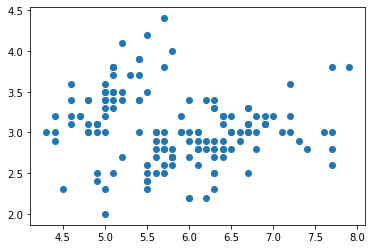

In [155]:
plt.scatter(df['sepal_length'], df['sepal_width']) 
plt.show()

COVARIANCE

In [165]:
Covariance = np.cov(df['sepal_length'], df['sepal_width'])[0][1]
print(Covariance)

-0.03926845637583893
